In [3]:
import pandas as pd
train = pd.read_csv(r"C:\Users\Eric\Desktop\Data Science Club\Data\train.csv")

In [4]:
train.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [3]:
train.project_grade_category.unique()

array(['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'],
      dtype=object)

In [34]:
train.project_subject_categories.unique()

array(['Literacy', 'Performing Arts, Team Sports',
       'Applied Sciences, Literature & Writing', 'Health & Wellness',
       'Character Education, Literature & Writing',
       'Early Development, Literature & Writing', 'Mathematics',
       'Literature & Writing, Mathematics', 'Literacy, Mathematics',
       'Character Education, Literacy', 'Literature & Writing',
       'Special Needs', 'ESL, Mathematics',
       'Health & Life Science, Mathematics',
       'College & Career Prep, Literature & Writing',
       'Early Development, Special Needs', 'Applied Sciences',
       'Early Development, Performing Arts', 'Mathematics, Special Needs',
       'Environmental Science, Literature & Writing',
       'Health & Wellness, Special Needs', 'Other, Special Needs',
       'Literacy, Social Sciences',
       'Health & Wellness, Literature & Writing', 'Music',
       'Literacy, Special Needs', 'Applied Sciences, Mathematics',
       'ESL, Literacy', 'Applied Sciences, Special Needs',
      

In [7]:
len(train.index)

182080

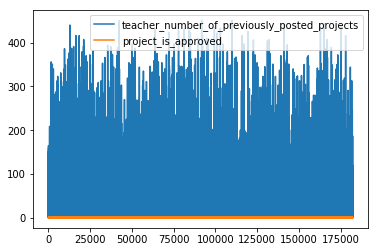

In [40]:
train.plot()

In [5]:
resources = pd.read_csv(r"C:\Users\Eric\Desktop\Data Science Club\Data\resources.csv")

In [8]:
resources.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [9]:
len(resources.index)

1541272

In [6]:
resource_new = resources.groupby(['id']).agg({
    'quantity':sum,
    'id':["count"],
    'price':sum})

resource_new.columns = ['total requested items', 'different items requests','cost requested']
resource_new.head()

,total requested items,different items requests,cost requested
id,,,
p000001,7,4,459.56
p000002,21,14,515.89
p000003,4,4,298.97
p000004,98,95,1113.69
p000005,8,4,485.99


In [24]:
resource_new.describe()

,total requested items,different items requests,cost requested
count,260115.000000,260115.000000,260115.000000
mean,16.949515,5.925348,297.950077
std,26.353225,8.324707,368.754986
min,1.000000,1.000000,0.660000
25%,4.000000,1.000000,104.745000
50%,9.000000,3.000000,206.020000
75%,21.000000,7.000000,379.640000
max,930.000000,100.000000,9999.000000


In [7]:
resource_new['id'] = resource_new.index
resource_new.tail()

,total requested items,different items requests,cost requested,id
id,,,,
p260111,27,27,176.08,p260111
p260112,6,2,39.79,p260112
p260113,3,3,811.49,p260113
p260114,39,10,222.56,p260114
p260115,2,2,318.97,p260115


In [8]:
merge_train = pd.merge(train, resource_new, on='id')
merge_train.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total requested items,different items requests,cost requested
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,6,2,299.98
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20,1,20.00
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,1,1,469.99
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,5,5,684.47
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,2,1,355.50


In [29]:
merge_train.describe()

,teacher_number_of_previously_posted_projects,project_is_approved,total requested items,different items requests,cost requested
count,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000
mean,11.237055,0.847682,16.971447,5.941509,297.731304
std,28.016086,0.359330,26.241957,8.349074,366.718002
min,0.000000,0.000000,1.000000,1.000000,0.660000
25%,0.000000,1.000000,4.000000,1.000000,104.480000
50%,2.000000,1.000000,9.000000,3.000000,205.980000
75%,9.000000,1.000000,21.000000,7.000000,379.000000
max,451.000000,1.000000,930.000000,100.000000,9999.000000


In [31]:
merge_train.to_csv('merge_train.csv')

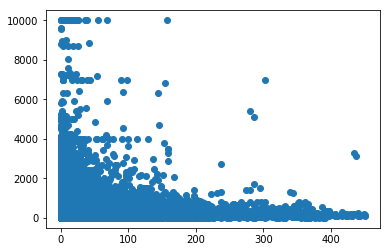

In [15]:
import matplotlib.pyplot  as plt
plt.scatter(merge_train['teacher_number_of_previously_posted_projects'],merge_train['cost requested'])

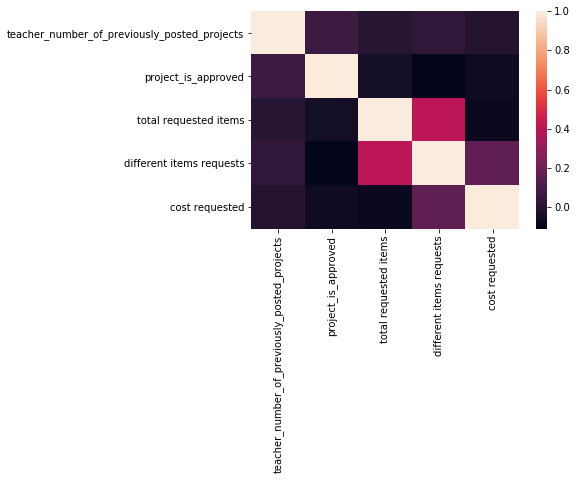

In [18]:
import seaborn as sb

sb.heatmap(merge_train.corr())  

In [36]:

X = merge_train['cost requested']
X.head()

0    299.98
1     20.00
2    469.99
3    684.47
4    355.50
Name: cost requested, dtype: float64

In [37]:
y = merge_train['project_is_approved']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: project_is_approved, dtype: int64

In [ ]:
## TO DO:
## Need to train model, create confusion matrix, and create test data submission
